In [1]:
%matplotlib inline  

import numpy as np
import pandas as pd
import requests
from bs4 import BeautifulSoup
import matplotlib.animation as animation
import matplotlib.pyplot as plt
from IPython.display import HTML

#  set the path to the ffmpeg utility
import os
if os.name == 'nt':
    plt.rcParams['animation.ffmpeg_path'] = 'C:\\Users\\pjsca\\Documents\\ffmpeg-20200403-52523b6-win64-static\\bin\\ffmpeg.exe'

# Initializations

In [2]:
# prepare styles for the plots
colors = ['r', 'g', 'b', 'y', 'c', 'k', 'm']
styles = ['-', '--', '-.', ':', '_-']

styles_colors = [c + s for s in styles for c in colors]

## Load Data

Load data from the known repos

In [3]:
# COVID confirmed cases
url_confirmed= 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv'
df_confirmed = pd.read_csv(url_confirmed, header=0)
    
# COVID associated death
url_deaths = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv'
df_death = pd.read_csv(url_deaths, header=0)

# World population
url_world_pop = 'https://www.worldometers.info/world-population/population-by-country/'
r = requests.get(url_world_pop)
soup = BeautifulSoup(r.content)
table = str(soup.find_all('table')[0])
df_world_pop = pd.read_html(table)[0]
df_world_pop.set_index('Country (or dependency)', inplace=True)

# First look at data
Let us have a look at data

In [4]:
df_confirmed

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,2/28/23,3/1/23,3/2/23,3/3/23,3/4/23,3/5/23,3/6/23,3/7/23,3/8/23,3/9/23
0,NaN,Afghanistan,33.939110,67.709953,0,0,0,0,0,0,...,209322,209340,209358,209362,209369,209390,209406,209436,209451,209451
1,NaN,Albania,41.153300,20.168300,0,0,0,0,0,0,...,334391,334408,334408,334427,334427,334427,334427,334427,334443,334457
2,NaN,Algeria,28.033900,1.659600,0,0,0,0,0,0,...,271441,271448,271463,271469,271469,271477,271477,271490,271494,271496
3,NaN,Andorra,42.506300,1.521800,0,0,0,0,0,0,...,47866,47875,47875,47875,47875,47875,47875,47875,47890,47890
4,NaN,Angola,-11.202700,17.873900,0,0,0,0,0,0,...,105255,105277,105277,105277,105277,105277,105277,105277,105288,105288
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284,NaN,West Bank and Gaza,31.952200,35.233200,0,0,0,0,0,0,...,703228,703228,703228,703228,703228,703228,703228,703228,703228,703228
285,NaN,Winter Olympics 2022,39.904200,116.407400,0,0,0,0,0,0,...,535,535,535,535,535,535,535,535,535,535
286,NaN,Yemen,15.552727,48.516388,0,0,0,0,0,0,...,11945,11945,11945,11945,11945,11945,11945,11945,11945,11945
287,NaN,Zambia,-13.133897,27.849332,0,0,0,0,0,0,...,343012,343012,343079,343079,343079,343135,343135,343135,343135,343135


In [5]:
df_death

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,2/28/23,3/1/23,3/2/23,3/3/23,3/4/23,3/5/23,3/6/23,3/7/23,3/8/23,3/9/23
0,NaN,Afghanistan,33.939110,67.709953,0,0,0,0,0,0,...,7896,7896,7896,7896,7896,7896,7896,7896,7896,7896
1,NaN,Albania,41.153300,20.168300,0,0,0,0,0,0,...,3598,3598,3598,3598,3598,3598,3598,3598,3598,3598
2,NaN,Algeria,28.033900,1.659600,0,0,0,0,0,0,...,6881,6881,6881,6881,6881,6881,6881,6881,6881,6881
3,NaN,Andorra,42.506300,1.521800,0,0,0,0,0,0,...,165,165,165,165,165,165,165,165,165,165
4,NaN,Angola,-11.202700,17.873900,0,0,0,0,0,0,...,1933,1933,1933,1933,1933,1933,1933,1933,1933,1933
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284,NaN,West Bank and Gaza,31.952200,35.233200,0,0,0,0,0,0,...,5708,5708,5708,5708,5708,5708,5708,5708,5708,5708
285,NaN,Winter Olympics 2022,39.904200,116.407400,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
286,NaN,Yemen,15.552727,48.516388,0,0,0,0,0,0,...,2159,2159,2159,2159,2159,2159,2159,2159,2159,2159
287,NaN,Zambia,-13.133897,27.849332,0,0,0,0,0,0,...,4057,4057,4057,4057,4057,4057,4057,4057,4057,4057


In [6]:
df_world_pop.head()

,#,Population (2020),Yearly Change,Net Change,Density (P/Km²),Land Area (Km²),Migrants (net),Fert. Rate,Med. Age,Urban Pop %,World Share
Country (or dependency),,,,,,,,,,,
China,1,1439323776,0.39 %,5540090,153,9388211,-348399.0,1.7,38,61 %,18.47 %
India,2,1380004385,0.99 %,13586631,464,2973190,-532687.0,2.2,28,35 %,17.70 %
United States,3,331002651,0.59 %,1937734,36,9147420,954806.0,1.8,38,83 %,4.25 %
Indonesia,4,273523615,1.07 %,2898047,151,1811570,-98955.0,2.3,30,56 %,3.51 %
Pakistan,5,220892340,2.00 %,4327022,287,770880,-233379.0,3.6,23,35 %,2.83 %


# Rearranging data 

## grouping data by countries instead of provinces/states
As we can see, some countries have their data divided by Province/states. Let us group all by country (we'll group columns with death numbers, not lat, long, ...)

First, put aside, in a another dataframe, lat and long.

In [7]:
df_lat_long = df_confirmed[['Country/Region', 'Lat', 'Long']]
df_confirmed = df_confirmed.drop(labels=['Province/State', 'Lat', 'Long'], axis=1)

set the lat and long to be the mean value between the known lat and long when grouping

In [8]:
df_lat_long = df_lat_long.groupby('Country/Region').mean().reset_index()
df_lat_long

,Country/Region,Lat,Long
0,Afghanistan,33.939110,67.709953
1,Albania,41.153300,20.168300
2,Algeria,28.033900,1.659600
3,Andorra,42.506300,1.521800
4,Angola,-11.202700,17.873900
...,...,...,...
196,West Bank and Gaza,31.952200,35.233200
197,Winter Olympics 2022,39.904200,116.407400
198,Yemen,15.552727,48.516388
199,Zambia,-13.133897,27.849332


In [9]:
columns_date = df_confirmed.columns[4:]
columns_date

Index(['1/25/20', '1/26/20', '1/27/20', '1/28/20', '1/29/20', '1/30/20',
       '1/31/20', '2/1/20', '2/2/20', '2/3/20',
       ...
       '2/28/23', '3/1/23', '3/2/23', '3/3/23', '3/4/23', '3/5/23', '3/6/23',
       '3/7/23', '3/8/23', '3/9/23'],
      dtype='object', length=1140)

In [10]:
df_confirmed = df_confirmed.groupby(by='Country/Region').sum().reset_index().set_index('Country/Region')
df_confirmed

,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,...,2/28/23,3/1/23,3/2/23,3/3/23,3/4/23,3/5/23,3/6/23,3/7/23,3/8/23,3/9/23
Country/Region,,,,,,,,,,,,,,,,,,,,,
Afghanistan,0,0,0,0,0,0,0,0,0,0,...,209322,209340,209358,209362,209369,209390,209406,209436,209451,209451
Albania,0,0,0,0,0,0,0,0,0,0,...,334391,334408,334408,334427,334427,334427,334427,334427,334443,334457
Algeria,0,0,0,0,0,0,0,0,0,0,...,271441,271448,271463,271469,271469,271477,271477,271490,271494,271496
Andorra,0,0,0,0,0,0,0,0,0,0,...,47866,47875,47875,47875,47875,47875,47875,47875,47890,47890
Angola,0,0,0,0,0,0,0,0,0,0,...,105255,105277,105277,105277,105277,105277,105277,105277,105288,105288
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
West Bank and Gaza,0,0,0,0,0,0,0,0,0,0,...,703228,703228,703228,703228,703228,703228,703228,703228,703228,703228
Winter Olympics 2022,0,0,0,0,0,0,0,0,0,0,...,535,535,535,535,535,535,535,535,535,535
Yemen,0,0,0,0,0,0,0,0,0,0,...,11945,11945,11945,11945,11945,11945,11945,11945,11945,11945


In [11]:
df_death.drop(labels=['Province/State'], axis=1, inplace=True)
df_death.head()

,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,...,2/28/23,3/1/23,3/2/23,3/3/23,3/4/23,3/5/23,3/6/23,3/7/23,3/8/23,3/9/23
0,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,0,...,7896,7896,7896,7896,7896,7896,7896,7896,7896,7896
1,Albania,41.15330,20.168300,0,0,0,0,0,0,0,...,3598,3598,3598,3598,3598,3598,3598,3598,3598,3598
2,Algeria,28.03390,1.659600,0,0,0,0,0,0,0,...,6881,6881,6881,6881,6881,6881,6881,6881,6881,6881
3,Andorra,42.50630,1.521800,0,0,0,0,0,0,0,...,165,165,165,165,165,165,165,165,165,165
4,Angola,-11.20270,17.873900,0,0,0,0,0,0,0,...,1933,1933,1933,1933,1933,1933,1933,1933,1933,1933


do the samething to the death dataframe

In [12]:
df_death.drop(labels=['Lat', 'Long'], axis=1, inplace=True)
df_death = df_death.groupby(by='Country/Region').sum().reset_index().set_index('Country/Region')
df_death

,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,...,2/28/23,3/1/23,3/2/23,3/3/23,3/4/23,3/5/23,3/6/23,3/7/23,3/8/23,3/9/23
Country/Region,,,,,,,,,,,,,,,,,,,,,
Afghanistan,0,0,0,0,0,0,0,0,0,0,...,7896,7896,7896,7896,7896,7896,7896,7896,7896,7896
Albania,0,0,0,0,0,0,0,0,0,0,...,3598,3598,3598,3598,3598,3598,3598,3598,3598,3598
Algeria,0,0,0,0,0,0,0,0,0,0,...,6881,6881,6881,6881,6881,6881,6881,6881,6881,6881
Andorra,0,0,0,0,0,0,0,0,0,0,...,165,165,165,165,165,165,165,165,165,165
Angola,0,0,0,0,0,0,0,0,0,0,...,1933,1933,1933,1933,1933,1933,1933,1933,1933,1933
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
West Bank and Gaza,0,0,0,0,0,0,0,0,0,0,...,5708,5708,5708,5708,5708,5708,5708,5708,5708,5708
Winter Olympics 2022,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Yemen,0,0,0,0,0,0,0,0,0,0,...,2159,2159,2159,2159,2159,2159,2159,2159,2159,2159


## Correct countries names

In [13]:
to_replace = {
    'United States' : 'US',
    'DR Congo' : 'Congo (Kinshasa)',
    'Congo' : 'Congo (Brazzaville)',
    'Czech Republic (Czechia)' : 'Czechia',
    'South Korea' : 'Korea, South',
    'Taiwan' : 'Taiwan*'
}
              
world_pop_index = list(df_world_pop.index)

for k, v in to_replace.items():
    i = world_pop_index.index(k)
    world_pop_index[i] = v

df_world_pop.index = world_pop_index
df_world_pop.head()

,#,Population (2020),Yearly Change,Net Change,Density (P/Km²),Land Area (Km²),Migrants (net),Fert. Rate,Med. Age,Urban Pop %,World Share
China,1,1439323776,0.39 %,5540090,153,9388211,-348399.0,1.7,38,61 %,18.47 %
India,2,1380004385,0.99 %,13586631,464,2973190,-532687.0,2.2,28,35 %,17.70 %
US,3,331002651,0.59 %,1937734,36,9147420,954806.0,1.8,38,83 %,4.25 %
Indonesia,4,273523615,1.07 %,2898047,151,1811570,-98955.0,2.3,30,56 %,3.51 %
Pakistan,5,220892340,2.00 %,4327022,287,770880,-233379.0,3.6,23,35 %,2.83 %


## Recompute the Density (P/Km²)
Holy See had 0 km²

In [14]:
df_world_pop.loc['Holy See', 'Land Area (Km²)'] = 0.44 # it was 0!

df_world_pop['Density (P/Km²)'] = df_world_pop['Population  (2020)'] / df_world_pop['Land Area (Km²)']
df_world_pop.sort_values(by='Density (P/Km²)', ascending=False)

,#,Population (2020),Yearly Change,Net Change,Density (P/Km²),Land Area (Km²),Migrants (net),Fert. Rate,Med. Age,Urban Pop %,World Share,Land Area (Km²),Density (P/Km²)
Holy See,235,801,0.25 %,2,2003,0,NaN,N.A.,N.A.,N.A.,0.00 %,0.44,1820.454545
China,1,1439323776,0.39 %,5540090,153,9388211,-348399.0,1.7,38,61 %,18.47 %,NaN,NaN
India,2,1380004385,0.99 %,13586631,464,2973190,-532687.0,2.2,28,35 %,17.70 %,NaN,NaN
US,3,331002651,0.59 %,1937734,36,9147420,954806.0,1.8,38,83 %,4.25 %,NaN,NaN
Indonesia,4,273523615,1.07 %,2898047,151,1811570,-98955.0,2.3,30,56 %,3.51 %,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
Saint Pierre & Miquelon,230,5794,-0.48 %,-28,25,230,NaN,N.A.,N.A.,100 %,0.00 %,NaN,NaN
Montserrat,231,4992,0.06 %,3,50,100,NaN,N.A.,N.A.,10 %,0.00 %,NaN,NaN
Falkland Islands,232,3480,3.05 %,103,0,12170,NaN,N.A.,N.A.,66 %,0.00 %,NaN,NaN
Niue,233,1626,0.68 %,11,6,260,NaN,N.A.,N.A.,46 %,0.00 %,NaN,NaN


# save data into files, for offline working if necessary

In [15]:
df_confirmed.to_csv('./data/confirmed.csv')
df_death.to_csv('./data/death.csv')
df_world_pop.to_csv('./data/world_pop.csv')

# get the top `number_of_countries` more affected coutries (and Portugal!)

In [16]:
number_of_countries=20

list_top_affected_countries = df_confirmed.sort_values(
                        by=df_confirmed.columns[-1], 
                        ascending=False
                    ).head(number_of_countries).index

list_top_affected_countries = list_top_affected_countries.append(pd.Index(['Portugal']))

list_top_affected_countries

Index(['US', 'India', 'France', 'Germany', 'Brazil', 'Japan', 'Korea, South',
       'Italy', 'United Kingdom', 'Russia', 'Turkey', 'Spain', 'Vietnam',
       'Australia', 'Argentina', 'Taiwan*', 'Netherlands', 'Iran', 'Mexico',
       'Indonesia', 'Portugal'],
      dtype='object')

# Evolution of the absolute number of confirmed cases by country (top affected countries & Portugal)

<Axes: title={'center': 'Number of confirmed cases evolution (top 20 countries & Portugal)'}>

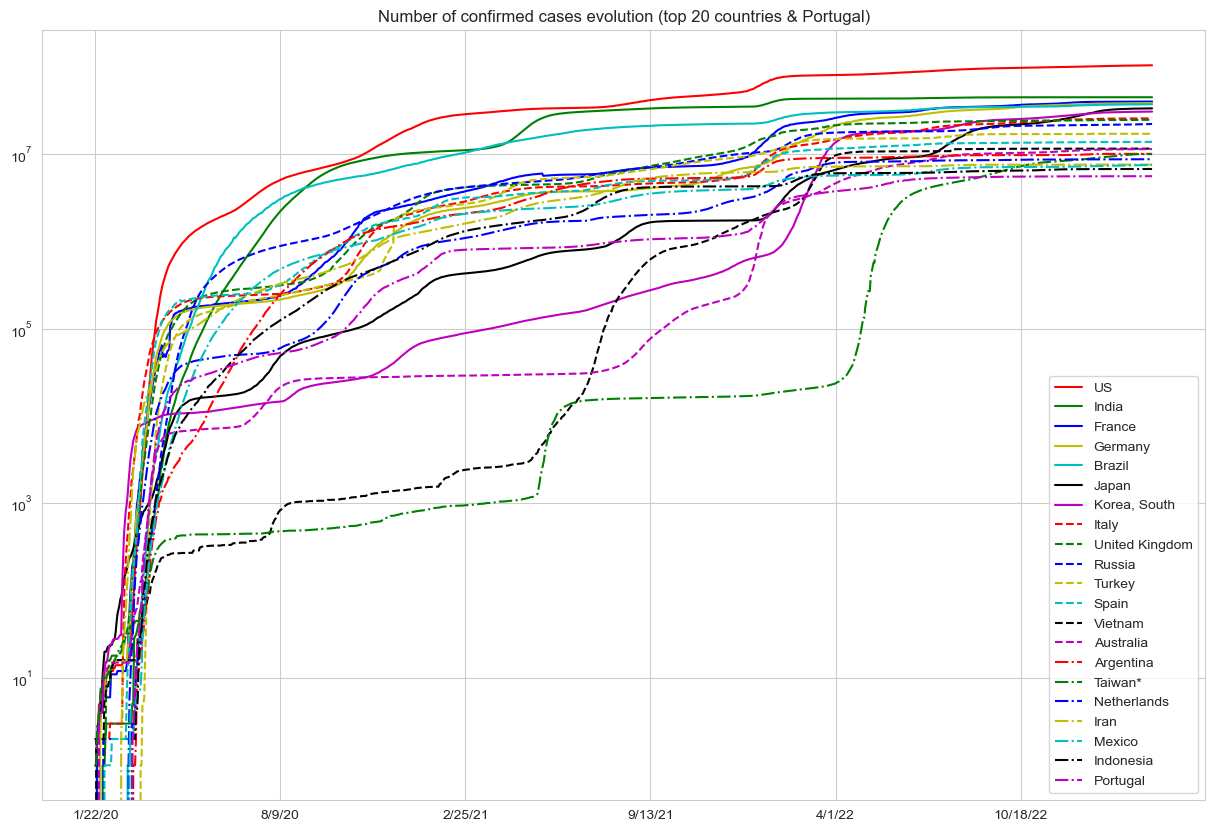

In [17]:
df_confirmed.loc[list_top_affected_countries].T.plot(
                                    figsize=(15, 10), 
                                    style=styles_colors,
                                    logy=True,
                                    title='Number of confirmed cases evolution (top 20 countries & Portugal)'
                                )

# Evolution of the absolute number of deaths by country (top affected countries)

<Axes: title={'center': 'Number of deaths evolution (top 20 countries & Portugal)'}>

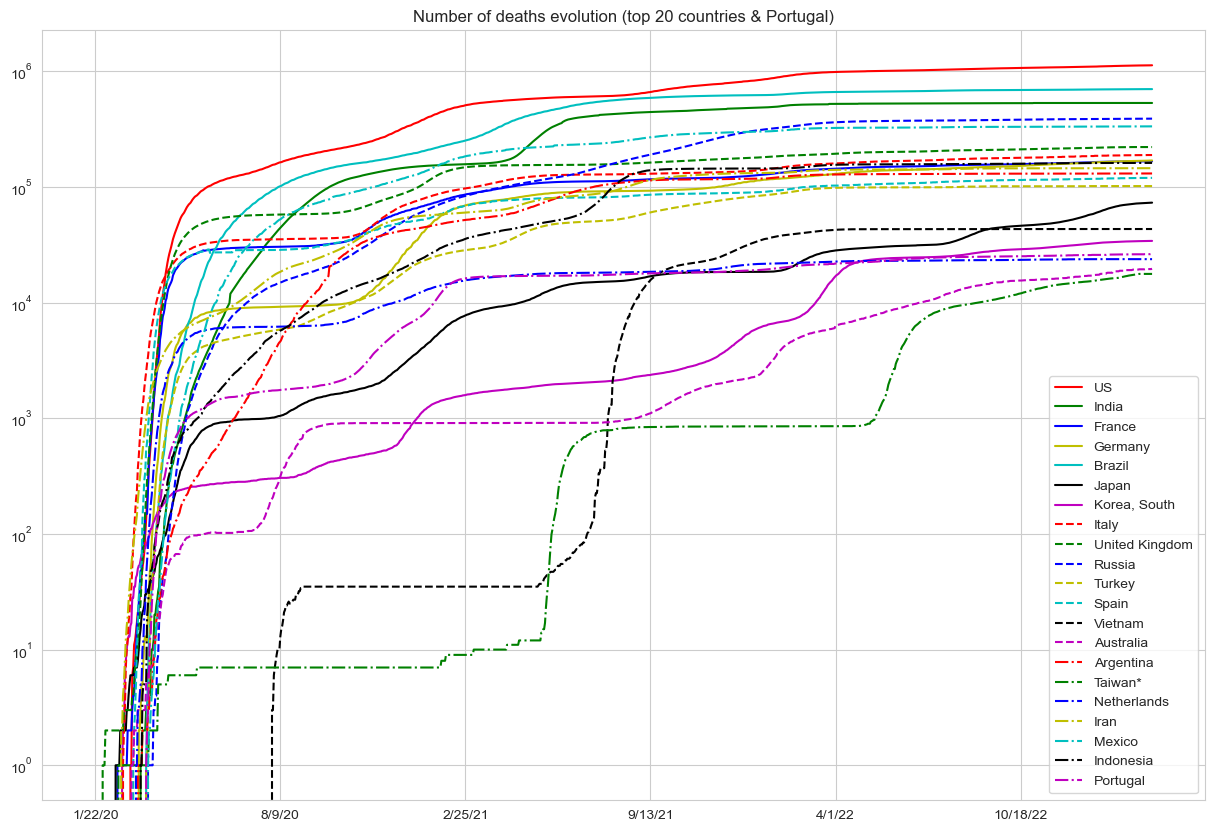

In [18]:
df_death.loc[list_top_affected_countries].T.plot(
                    figsize=(15, 10), 
                    style=styles_colors,
                    logy=True,
                    title='Number of deaths evolution (top 20 countries & Portugal)'
                )

# Number of death per confirmed case (top affected countries)

<Axes: title={'center': 'Percentage of death by confirmed case'}>

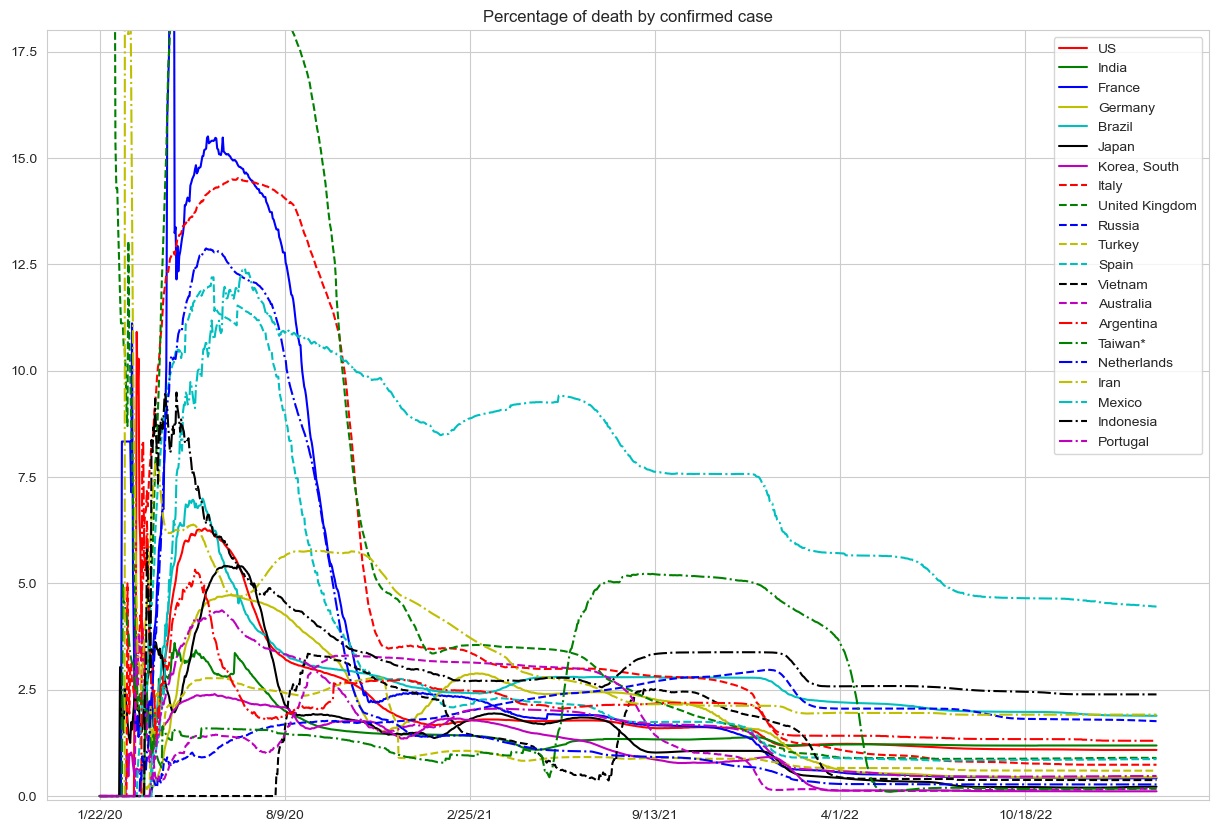

In [19]:
df_death_by_confirmed = df_death.loc[list_top_affected_countries] / df_confirmed.loc[list_top_affected_countries]
df_death_by_confirmed = df_death_by_confirmed.fillna(0)*100

df_death_by_confirmed.T.plot(
                            figsize=(15, 10), 
                            ylim=(-0.1, 18), 
                            style=styles_colors, 
                            title='Percentage of death by confirmed case'
                        )

# Confirmed/death data relative to the population size (top affected countries & Portugal)

First data is normalized by population size

In [20]:
df_confirmed.loc[list_top_affected_countries]

,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,...,2/28/23,3/1/23,3/2/23,3/3/23,3/4/23,3/5/23,3/6/23,3/7/23,3/8/23,3/9/23
US,1,1,2,2,5,5,5,6,6,8,...,103443455,103533872,103589757,103648690,103650837,103646975,103655539,103690910,103755771,103802702
India,0,0,0,0,0,0,0,0,1,1,...,44687837,44688105,44688388,44688722,44689046,44689327,44689593,44689919,44690298,44690738
France,0,0,2,3,3,3,4,5,5,5,...,39827175,39831700,39835896,39839090,39839090,39839090,39847236,39854299,39860410,39866718
Germany,0,0,0,0,0,1,4,4,4,5,...,38168908,38189954,38202571,38210850,38210850,38210851,38210851,38231610,38241231,38249060
Brazil,0,0,0,0,0,0,0,0,0,0,...,37052936,37063464,37063464,37081209,37081209,37081209,37076053,37076053,37076053,37076053
Japan,2,2,2,2,4,4,7,7,11,15,...,33227230,33241180,33252686,33263208,33273639,33282370,33286633,33298799,33310604,33320438
"Korea, South",1,1,2,2,3,4,4,4,4,11,...,30526012,30533573,30543981,30555102,30555102,30569215,30581499,30594297,30605187,30615522
Italy,0,0,0,0,0,0,0,0,0,2,...,25576852,25576852,25576852,25603510,25603510,25603510,25603510,25603510,25603510,25603510
United Kingdom,0,0,0,0,0,0,0,0,0,2,...,24603373,24603450,24629830,24629840,24629840,24629840,24629840,24629846,24629922,24658705
Russia,0,0,0,0,0,0,0,0,0,2,...,21960719,21974098,21988110,22002485,22016406,22029824,22040875,22051220,22063473,22075858


In [21]:
df_world_pop.loc[list_top_affected_countries]['Population  (2020)']

US                 331002651
India             1380004385
France              65273511
Germany             83783942
Brazil             212559417
Japan              126476461
Korea, South        51269185
Italy               60461826
United Kingdom      67886011
Russia             145934462
Turkey              84339067
Spain               46754778
Vietnam             97338579
Australia           25499884
Argentina           45195774
Taiwan*             23816775
Netherlands         17134872
Iran                83992949
Mexico             128932753
Indonesia          273523615
Portugal            10196709
Name: Population  (2020), dtype: int64

In [22]:
df_confirmed_by_pop = df_confirmed.loc[list_top_affected_countries].div(
                                df_world_pop.loc[list_top_affected_countries]['Population  (2020)'],
                                axis=0
                            )

df_death_by_pop = df_death.loc[list_top_affected_countries].div(
                                df_world_pop.loc[list_top_affected_countries]['Population  (2020)'],
                                axis=0
                            )

<Axes: title={'center': 'confirmed case by population size ratio (top 20)'}>

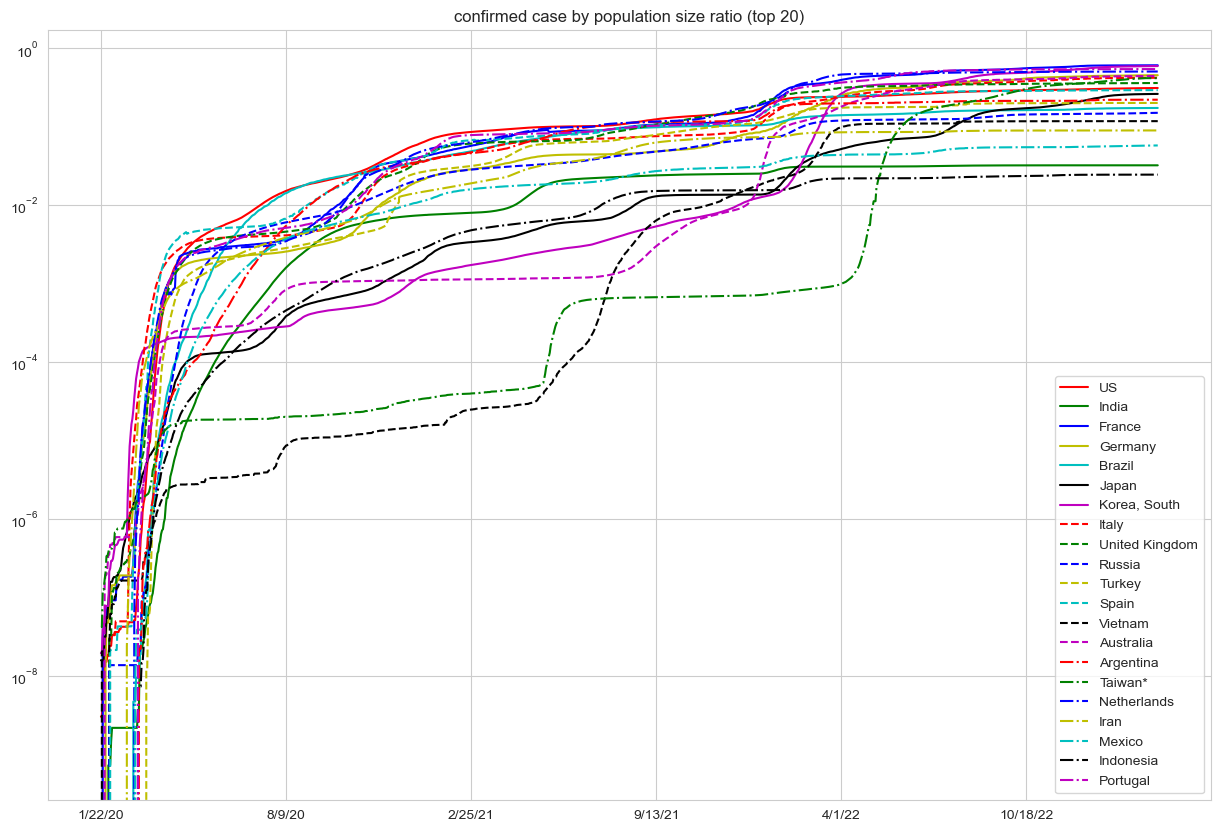

In [23]:
df_confirmed_by_pop.T.plot(
                            figsize=(15, 10), 
                            style=styles_colors,
                            title='confirmed case by population size ratio (top 20)',
                            logy=True
                        )

<Axes: title={'center': 'deaths by population size ratio (top 20 countries)'}>

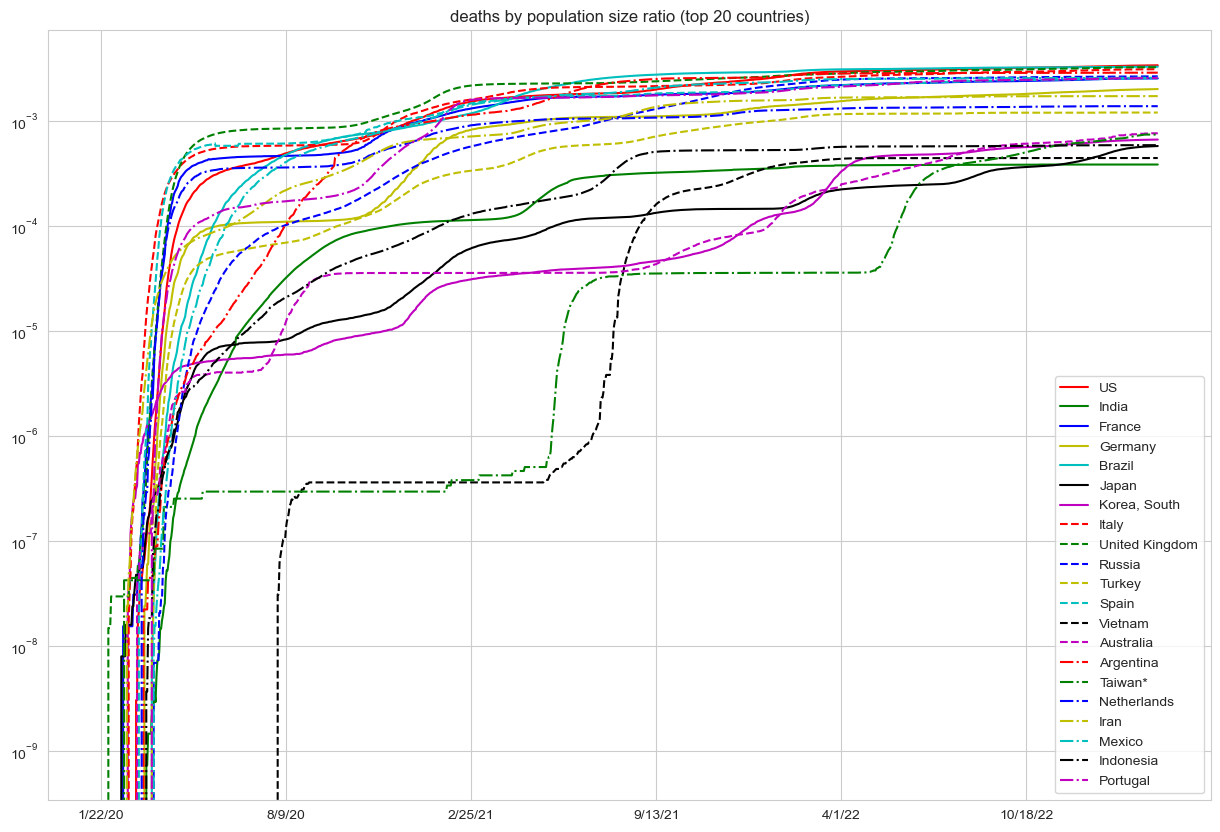

In [24]:
df_death_by_pop.T.plot(
            figsize=(15, 10), 
            style=styles_colors,
            title='deaths by population size ratio (top 20 countries)',
            logy=True
        )

# Confirmed/death data relative to the country size (top affected countries)

First data is normalized by coutries' area

In [25]:
df_confirmed_by_size = df_confirmed.loc[list_top_affected_countries].div(
                                df_world_pop.loc[list_top_affected_countries]['Land Area (Km²)'],
                                axis=0
                            )
df_death_by_size = df_death.loc[list_top_affected_countries].div(
                                df_world_pop.loc[list_top_affected_countries]['Land Area (Km²)'],
                                axis=0
                            )

<Axes: title={'center': "number of confirmed cases relative to the countries' sizes"}>

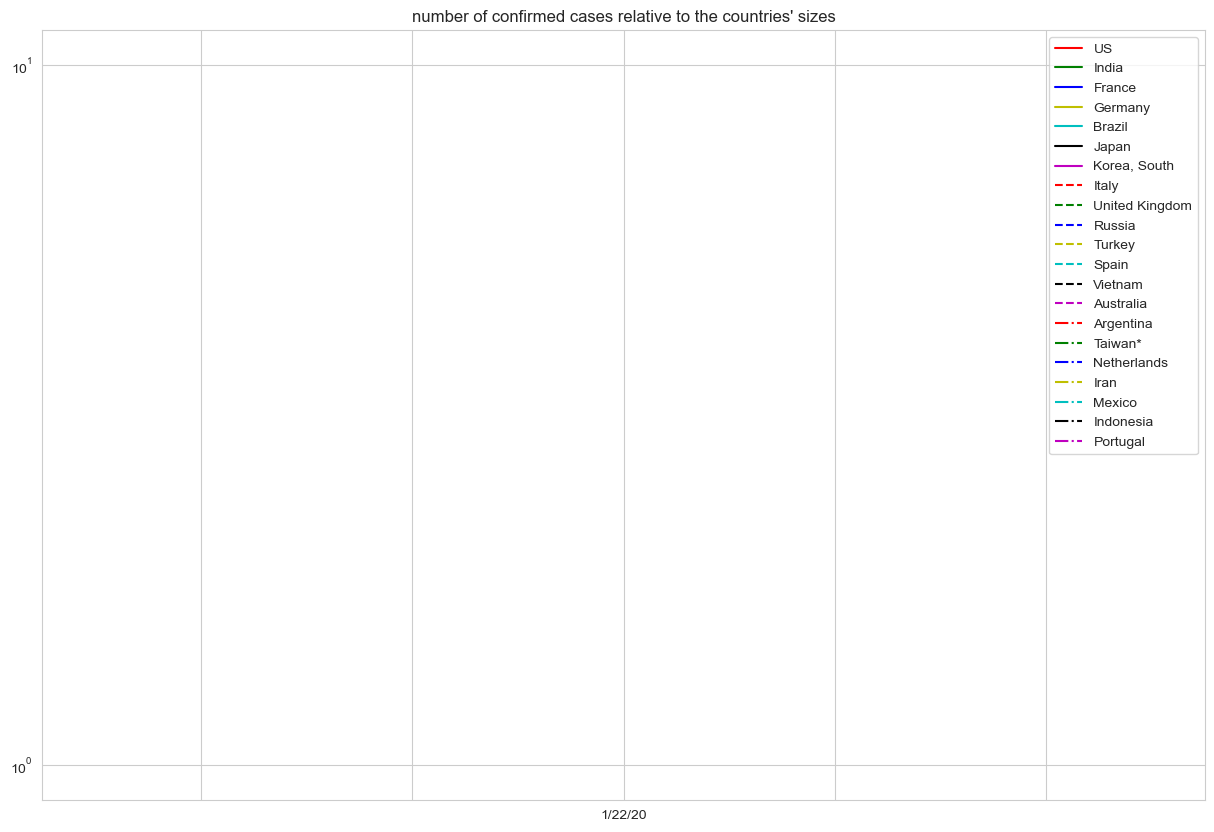

In [26]:
df_confirmed_by_size.T.plot(
                                figsize=(15, 10), 
                                logy=True, 
                                style=styles_colors,
                                title="number of confirmed cases relative to the countries' sizes"
                            )

<Axes: title={'center': "number of deaths relative to the countries' sizes"}>

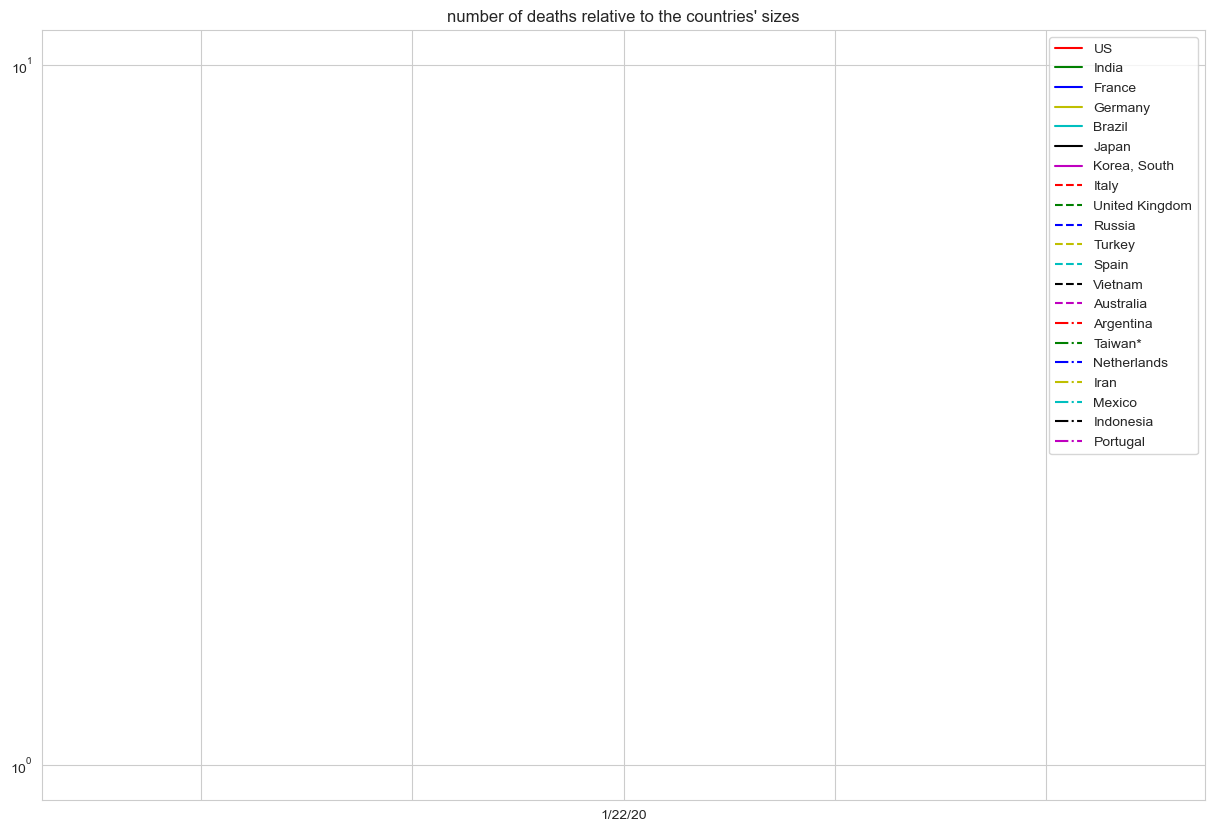

In [27]:
df_death_by_size.T.plot(
                    figsize=(15, 10), 
                    logy=True, 
                    style=styles_colors,
                    title="number of deaths relative to the countries' sizes",
                    grid=True
                )

# Growing rate over time (top affected countries)

In [28]:
df_today = df_confirmed.loc[list_top_affected_countries, df_confirmed.columns[1:]].astype(float)
# print(df_today)
df_previous_day = df_confirmed.loc[list_top_affected_countries, df_confirmed.columns[:-1]].astype(float)
# print(df_previous_day)

df_confirmed_growth_rate =  ((df_today - df_previous_day.values) / df_previous_day.values).replace(np.inf, np.nan) + 1
df_confirmed_growth_rate.head()

,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,2/1/20,...,2/28/23,3/1/23,3/2/23,3/3/23,3/4/23,3/5/23,3/6/23,3/7/23,3/8/23,3/9/23
US,1.0,2.0,1.0,2.5,1.0,1.000000,1.20,1.0,1.333333,1.0,...,1.000422,1.000874,1.000540,1.000569,1.000021,0.999963,1.000083,1.000341,1.000626,1.000452
India,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,1.0,...,1.000005,1.000006,1.000006,1.000007,1.000007,1.000006,1.000006,1.000007,1.000008,1.000010
France,NaN,NaN,1.5,1.0,1.0,1.333333,1.25,1.0,1.000000,1.2,...,1.000142,1.000114,1.000105,1.000080,1.000000,1.000000,1.000204,1.000177,1.000153,1.000158
Germany,NaN,NaN,NaN,NaN,NaN,4.000000,1.00,1.0,1.250000,1.6,...,1.000652,1.000551,1.000330,1.000217,1.000000,1.000000,1.000000,1.000543,1.000252,1.000205
Brazil,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.000397,1.000284,1.000000,1.000479,1.000000,1.000000,0.999861,1.000000,1.000000,1.000000


<Axes: title={'center': 'growth rate of confirmed cases'}>

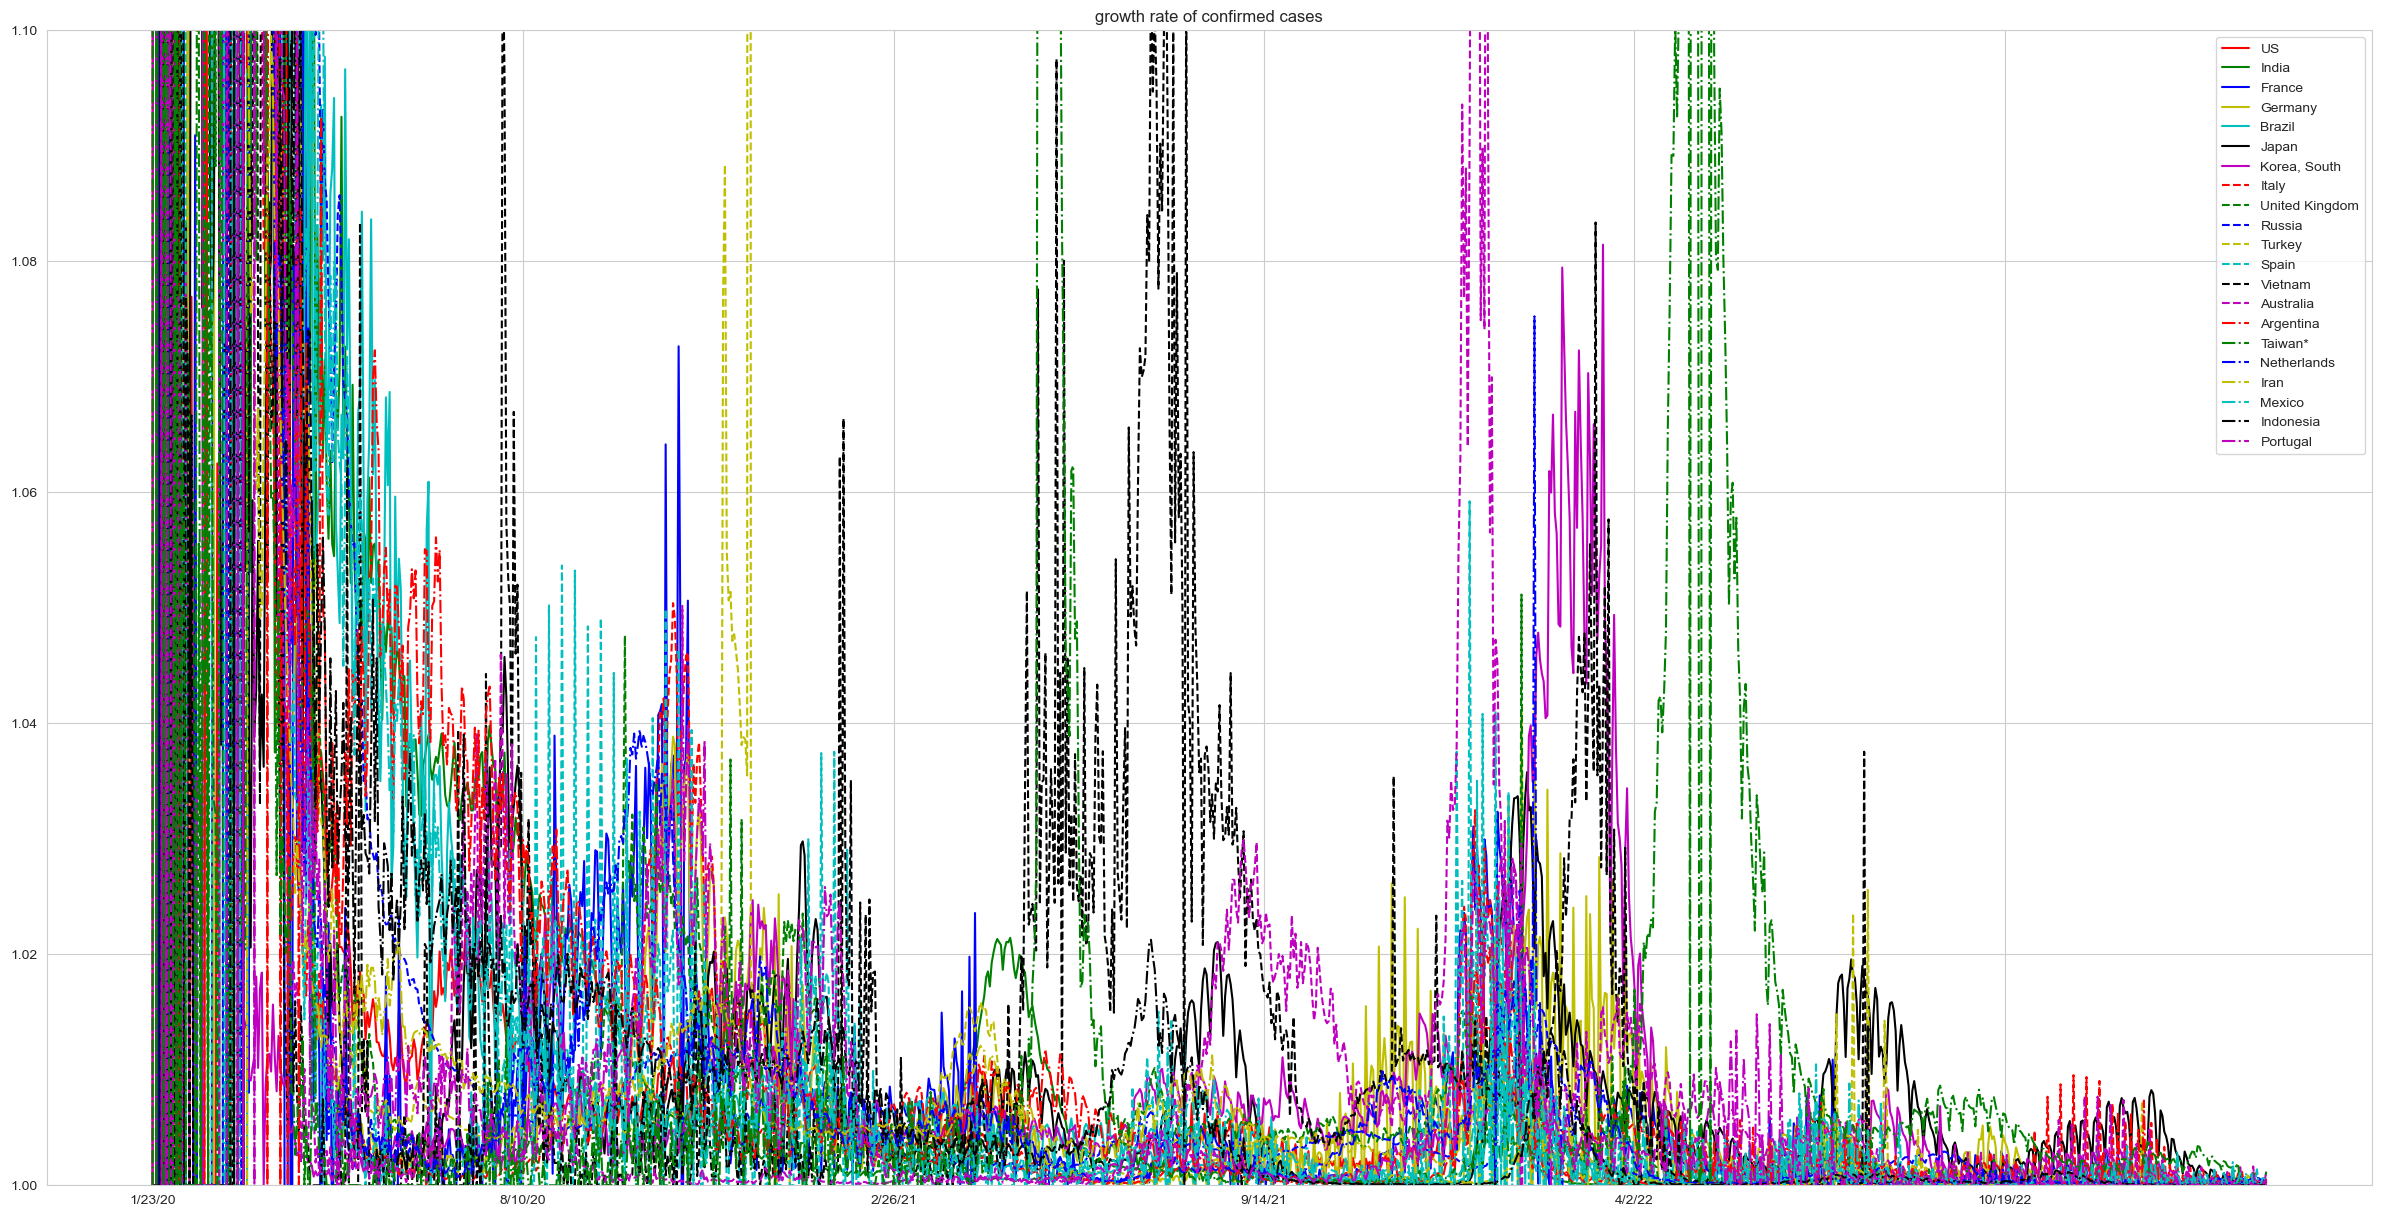

In [29]:
df_confirmed_growth_rate.T.plot(
                     figsize=(30, 15), 
                    style=styles_colors,
                    title="growth rate of confirmed cases",
                    ylim=(1, 1.1),
                    grid=True
                    )

# Growing rate (top affected countries)

In [ ]:
# %matplotlib inline

number_of_amortization_days = 10

def animate(i, *args, **kargs):
    df, df_delta, max_x, max_y, dates, x_label = args
    i += number_of_amortization_days 
    today = dates[i]
    delta_today = 'delta_' + today

    fig.clear()
    plt.xscale('log')
    plt.yscale('log')
    plt.xlim(1, max_x)
    plt.ylim(1, max_y)
    plt.xlabel(x_label)
    plt.ylabel('Absolute growth')
    plt.title(f'{today}')
    
    
    for idx, country in enumerate(df.index):
        xx = df.loc[country, dates[:i]].values
        yy = df_delta.loc[country, dates[:i]].values
        plt.plot(xx, yy, styles_colors[idx])
        plt.annotate(country, (xx[-1], yy[-1]))
    
def prepare_data(df_in):
    # get the dates
    dates = df_in.columns
    print(dates)

    # copy the dataframe
    df = df_in.loc[list_top_affected_countries].copy()

    # to avoid errors, replace 0 and NaN by a very small value
    df.fillna(1)
    df[df == 0] = 1

    # create dataframe to hold variations
    df_delta = pd.DataFrame()
    # add the delta (variation) columns, amortized by the computation of the mean of the last days variation
    # it's supoposed the series of confirmed cases in crescent
    for i_today in range(number_of_amortization_days, len(dates)):
        df_delta[dates[i_today]] = (df[dates[i_today]] - df[dates[i_today - number_of_amortization_days]]) / number_of_amortization_days
    df_delta.fillna(1)
    dates = df_delta.columns

    # maximum number of confirmed cases
    max_x = df[dates].max().max()
    # maximum variation
    max_y = df_delta.max().max()

    print(f'max delta: {max_y}  max confirmed: {max_x}')
    
    return df, df_delta, max_x, max_y, dates

In [ ]:
%matplotlib inline
import matplotlib
matplotlib.rcParams['animation.embed_limit'] = 2**128

df, df_delta, max_x, max_y, dates = prepare_data(df_confirmed)
x_label = 'Number of confirmed cases'

Writer = animation.writers['ffmpeg']
writer = Writer(fps=2, metadata=dict(artist='pcardoso@ualg.pt'))

plt.ioff()
fig = plt.figure(figsize=(10, 10))
ani = animation.FuncAnimation(fig, animate, frames=len(df_delta.columns)-10, fargs=(df, df_delta, max_x, max_y, dates, x_label), repeat=False, repeat_delay=5)
ani.save('evolution.mp4', writer=writer)
HTML(ani.to_jshtml())

In [ ]:
# %matplotlib inline 

df, df_delta, max_x, max_y, dates = prepare_data(df_death)
x_label = 'Number of death'

Writer = animation.writers['ffmpeg']
writer = Writer(fps=2, metadata=dict(artist='pcardoso@ualg.pt'))

fig = plt.figure(figsize=(10, 10))
ani = animation.FuncAnimation(fig, animate, frames=len(df_delta.columns), fargs=(df, df_delta, max_x, max_y, dates, x_label), repeat=False, repeat_delay=5)
ani.save('evolution_death.mp4', writer=writer)
HTML(ani.to_jshtml())